# Week 04 Lab Exercises: Visualisation of Multivariate Dataset

This week's exercises will focus on applying appropriate visualisation techniques to help with the analysis of multivariate dataset.

Before you approach the tasks below, you should walk through the visualisation examples notebook in __week04-examples-visualisation.ipynb__.

Please note: the instruction for this week's exercises is less prescriptive than previous exercises.
The intention is to encourage you to apply the visualisation techniques introduced in the lecture to help formulate a qualitative answer to the question posed to you.

In [35]:
#This is ipython magic command which specifies how a matplotlib plot will be displayed in the notebook.
%matplotlib notebook
%matplotlib inline
#pandas untilites and methods are from the pandas package
import pandas as pd
import numpy as np
import random
import math

#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

## Task 1: Visual exploration of adult dataset

In this task, you will be instructed to use specific visualisation techniques to explore the relationship between attribute pairs in the adult dataset.

In [36]:
adult_data = pd.read_csv('./data/adult/adult_full.data')

adult_data.sample(3)

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
41196,32,?,339099,Some-college,10,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K
24919,39,Private,333305,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,45,United-States,>50K
39718,35,Private,150309,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1887,40,United-States,>50K


### 1a. Pair-wise relationship using cross tabulation, heatmap and 3D bar chart

Use cross tabulation, heatmap and 3D bar chart to show the relationship between occupation and education

__Question:__ What are the most likely occupation for people with at least a Bachlor's degree?

__Answer:__ Prof-specialty

In [37]:
pd.crosstab(adult_data.occupation, adult_data["education-num"] >= 13)

education-num,False,True
occupation,,
?,2447,362
Adm-clerical,4723,888
Armed-Forces,11,4
Craft-repair,5733,379
Exec-managerial,3129,2957
Farming-fishing,1355,135
Handlers-cleaners,1988,84
Machine-op-inspct,2909,113
Other-service,4620,303


[Text(0, 0, ' ?'),
 Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Priv-house-serv'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Transport-moving')]

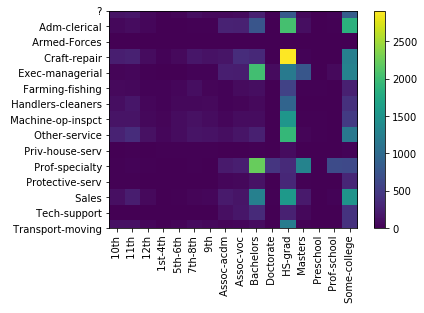

In [38]:
ctab = pd.crosstab(adult_data.occupation, adult_data.education)
#convert the data frame into a numpy array
#we will treat this array as an image
image = ctab.to_numpy()

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

#plot the image on the axis of the plot
image = axis.imshow(image)

#show the color bar
fig.colorbar(image)

#add labels and ticks to the axis for enhancement
col_labels = ctab.columns.to_list()
row_labels = ctab.index.values

axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels)

[Text(0, 0, ' ?'),
 Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Priv-house-serv'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Transport-moving')]

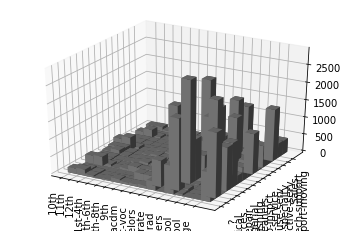

In [39]:
#Note: This example uses matplotlib package for visualisation.

#In this example we will use a 3D bar chart to show the cross tabulation between relationship and education

#the pandas crosstab method returns the results as a data frame
ctab = pd.crosstab(adult_data.occupation, adult_data.education)

#convert the data frame into a numpy array
#we will treat this array as an image
image = ctab.to_numpy()

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
#this time projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

col_labels = ctab.columns.to_list()
row_values = ctab.index.values

#enumerate through the columns and rows of the cross tab
for x in range(len(col_labels)):
    for y in range(len(row_values)):
        #for each cell in the cross tab draw a 3D bar at a designated location
        #the height of the bar is determined by the cell value
        axis.bar3d(x,y,0, 1,1, ctab.iloc[y,x], zsort='average', color='grey')

axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels, rotation='vertical')

### 1b. Use boxplots to show the relationship between education and education-num.

Please note, all boxplots must be placed in one figure for the purpose of visualisation.

Once you have created the plot, answer the following question based on the visualisation.

__Question:__ Is the education-num attribute equivalent to the education attribute? Please, justify your answer by relating it to the visualisation.

__Answer:__ Yes, the education-num attribute is equivalent to the education attribute because as the boxplot shows, each education number has a unique education label.

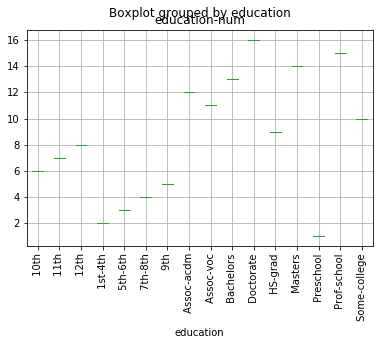

In [40]:
#We can also create multiple box plots for each category of an attribute
#E.g. age for each occupation

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

adult_data.boxplot(column='education-num', by='education', rot=90, ax = axis)

### 1c. Use ONE suitable visualisation to help determine the truth value of the following statements

__Statement 1:__ People whose native-country is United-States are more likely to earn >50K. 

__Statement 2:__ People work longer hours-per-week are more likely to earn <=50K.

__Statement 3:__ A person's hours-per-week is related to his/her occupation.


In [41]:

ctab = pd.crosstab(adult_data['native-country'] == " United-States", 
                   adult_data.salary, normalize=True, margins=True)



ctab


salary,<=50K,>50K,All
native-country,,,
False,0.082245,0.020331,0.102576
True,0.678473,0.218951,0.897424
All,0.760718,0.239282,1.000000


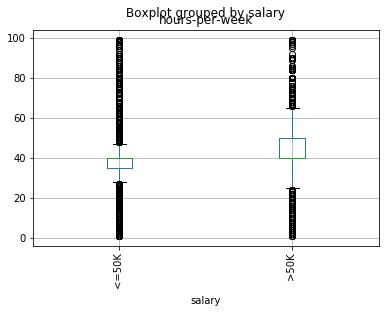

In [42]:
#We can also create multiple box plots for each category of an attribute
#E.g. age for each occupation

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

adult_data.boxplot(column='hours-per-week', by='salary', rot=90, ax = axis)

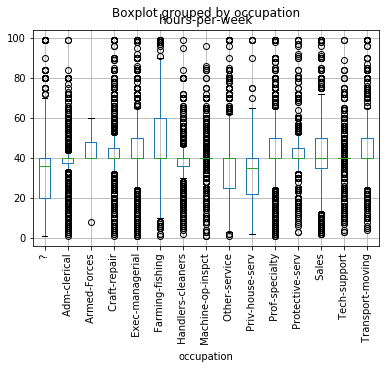

In [53]:
#We can also create multiple box plots for each category of an attribute
#E.g. age for each occupation

#create a figure using matplotlib
fig = plt.figure()

#add a subplot of 1x1x1 (i.e. 1 plot) onto the figure
axis = fig.add_subplot(111)

adult_data.boxplot(column='hours-per-week', by='occupation', rot=90, ax = axis)

## Task 2: Visual exploration of wine quality dataset

In this task, you will use visualisation techniques to explore the wine quality dataset.

The wine quality dataset was created by Paulo Cortez et.al. see P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The dataset consist of 12 attributes in which only the quality attribute is ordinal and the rest are contiuous.
Moreover, the dataset is divided into red and white wine. For further details: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

The main two questions for this task are:

__Question 1:__ Which combination of variables are useful for distinguishing red and white wine?

__Question 2:__ Which combination of variables are important for predicting the quality of a wine?

__Please note:__ you do not have to present quantitative answers to the questions. Your aim is to use visualisation to help with the exploration.

In [44]:
#data set for red wine
red_wine_quality_data = pd.read_csv('./data/wine-quality/winequality-red.csv', delimiter=';')
#data set for white wine
white_wine_quality_data = pd.read_csv('./data/wine-quality/winequality-white.csv', delimiter=';')

red_wine_quality_data.sample(10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.50,5
556,10.9,0.530,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.70,6
1166,9.9,0.540,0.26,2.0,0.111,7.0,60.0,0.99709,2.94,0.98,10.20,5
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.90,6
1242,9.0,0.400,0.41,2.0,0.058,15.0,40.0,0.99414,3.22,0.60,12.20,6
565,12.7,0.600,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.40,5
858,11.7,0.280,0.47,1.7,0.054,17.0,32.0,0.99686,3.15,0.67,10.60,7
1003,6.8,0.360,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.80,7
1315,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.80,6
1395,8.6,0.685,0.10,1.6,0.092,3.0,12.0,0.99745,3.31,0.65,9.55,6


In [45]:
white_wine_quality_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2217,8.1,0.25,0.38,3.80,0.051,18.0,129.0,0.99280,3.21,0.38,11.5,6
3288,6.6,0.20,0.14,4.40,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,6
2029,7.6,0.34,0.39,7.60,0.040,45.0,215.0,0.99650,3.11,0.53,9.2,6
1929,8.8,0.34,0.33,9.70,0.036,46.0,172.0,0.99660,3.08,0.40,10.2,5
3952,7.0,0.16,0.30,2.60,0.043,34.0,90.0,0.99047,2.88,0.47,11.2,6
658,6.6,0.27,0.25,3.10,0.052,41.0,188.0,0.99150,3.24,0.40,11.3,5
3033,6.8,0.24,0.38,8.30,0.045,50.0,185.0,0.99578,3.15,0.50,9.5,6
3016,7.0,0.13,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,6
2483,6.3,0.27,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,6
637,7.4,0.28,0.25,11.90,0.053,25.0,148.0,0.99760,3.10,0.62,9.2,5


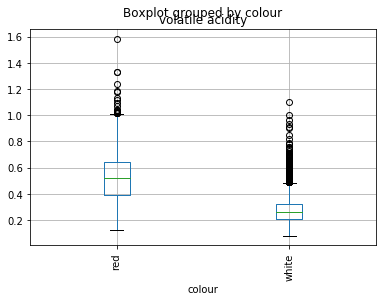

In [46]:
#add a column to show what colour each dataset is
red_wine_quality_data['colour'] = 'red'
white_wine_quality_data['colour'] = 'white'
#add to array
wine_data = [red_wine_quality_data,white_wine_quality_data]
#combine them so we can all data in box plots
combinedDf = pd.concat(wine_data)

#Create a box plot to show volatile acidity of each
fig = plt.figure()
axis = fig.add_subplot(111)
combinedDf.boxplot(column='volatile acidity', by='colour', rot=90, ax = axis)

# THIS BOX PLOT SHOWS THAT VOLATILE ACIDITY IN RED WINE IS GENERALLY HIGHER


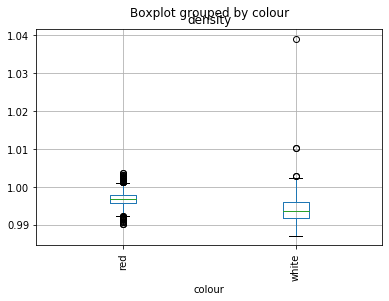

In [47]:
#Create a box plot to show density of each
fig = plt.figure()
axis = fig.add_subplot(111)
combinedDf.boxplot(column='density', by='colour', rot=90, ax = axis)

# THIS BOX PLOT SHOWS THAT DENSITY IN RED WINE IS GENERALLY HIGHER


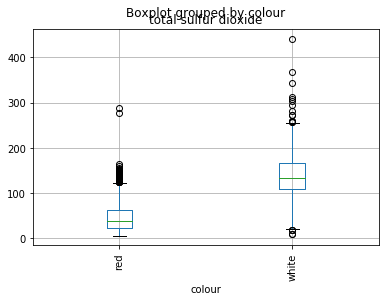

In [48]:
#Create a box plot to show density of each
fig = plt.figure()
axis = fig.add_subplot(111)
combinedDf.boxplot(column='total sulfur dioxide', by='colour', rot=90, ax = axis)

# THIS BOX PLOT SHOWS THAT TOTAL SULFUR DIOXIDE IN WHITE WINE IS GENERALLY HIGHER


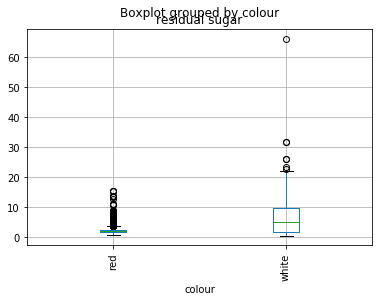

In [49]:
#Create a box plot to show density of each
fig = plt.figure()
axis = fig.add_subplot(111)
combinedDf.boxplot(column='residual sugar', by='colour', rot=90, ax = axis)

# THIS BOX PLOT SHOWS THAT WHITE WINE GENERALLY CONTAINS MORE RESIDUAL SUGAR


#USING VOLATILE ACIDITY, RESIDUAL SUGAR, DENSITY AND TOTAL SULFUR DIOXIDE, IT WOULD BE RELATIVELY STRAIGHTFORWARD TO
#DISTINGUISH BETWEEN RED AND WHITE WINE


In [50]:
#Question 2
red_wine_quality_data.corr(method='pearson')

#There isn't much correlation between quality and other variables for red wine, the highest is alcohol but that isn't very strong


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [51]:
white_wine_quality_data.corr(method='pearson')

#There isn't much correlation between quality and other variables for white wine, the highest is alcohol
#but that isn't very strong


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678
